In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
#loading the datset and viewing the datset
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#since the columns doesnt have column names we need to give them column names
bos.columns = boston.feature_names

In [4]:
# dataset description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#since the bos dataset have only feature columns we need to add target variable as well , wecan omit this but for better understanding we are merging this
bos['Target']=pd.DataFrame(boston.target)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
#We dont have any missing value-stated in description of the dataset: verifying
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [7]:
bos.shape

(506, 14)

In [8]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# outlier detection:

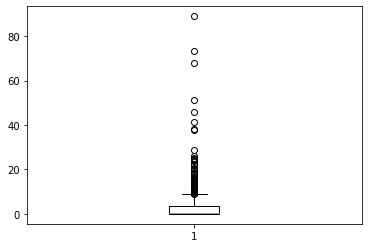

In [9]:
# There are high chaces that CRIM and ZN columns are skewed,as we can see there is huge difference between mean and max
plt.boxplot(bos.CRIM)
plt.show()

In [10]:
#calculating upper limit and lower limit-Outlier detection
def ul_ll(column):
    
    q1,q3=bos[column].quantile([0.25,0.75])
    UL = q3 + 1.5*(q3-q1)
    LL = q1 - 1.5*(q3-q1)
    return UL,LL

In [11]:
UL_CRIM,LL_CRIM = ul_ll("CRIM")
UL_CRIM,LL_CRIM

(9.06963875, -5.31051125)

In [12]:
# total outliers in CRIM column
bos[(bos['CRIM']>UL_CRIM) | (bos['CRIM']<LL_CRIM)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
367,13.5222,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
371,9.2323,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
373,11.1081,0.0,18.1,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
374,18.4982,0.0,18.1,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
375,19.6091,0.0,18.1,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,15.5757,0.0,18.1,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13,19.1
469,13.0751,0.0,18.1,0.0,0.580,5.713,56.7,2.8237,24.0,666.0,20.2,396.90,14.76,20.1
477,15.0234,0.0,18.1,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
478,10.2330,0.0,18.1,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03,14.6


In [13]:
UL_ZN,LL_ZN = ul_ll("ZN")
UL_ZN,LL_ZN

(31.25, -18.75)

In [14]:
# total outliers in ZN column
bos[(bos['ZN']>UL_ZN) | (bos['ZN']<LL_ZN)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32,30.8
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,34.9
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49,24.1
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79,18.6
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,384.46,4.50,30.1
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2


In [15]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Target     float64
dtype: object

# distribution

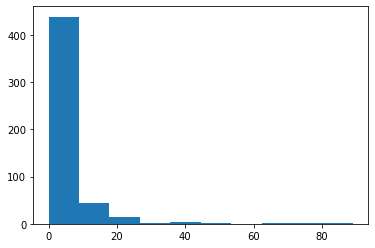

In [16]:
plt.hist(bos['CRIM'])
plt.show()

In [17]:
import scipy.stats as stat
import pylab 

#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

CRIM


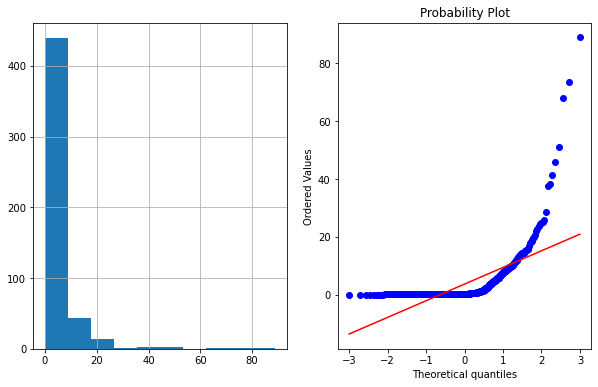

ZN


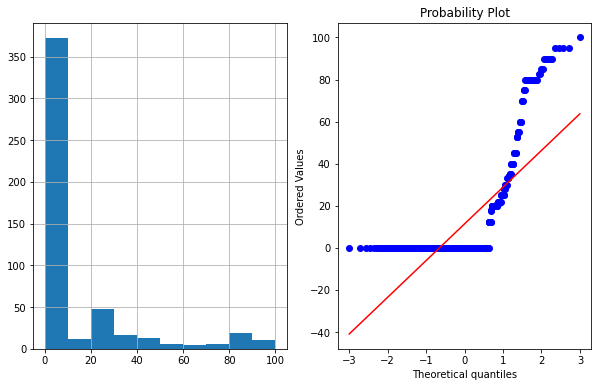

INDUS


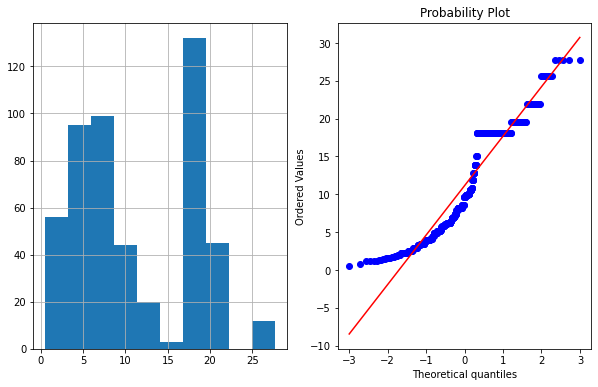

CHAS


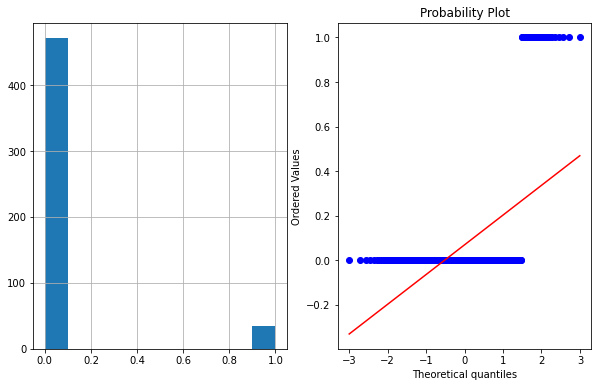

NOX


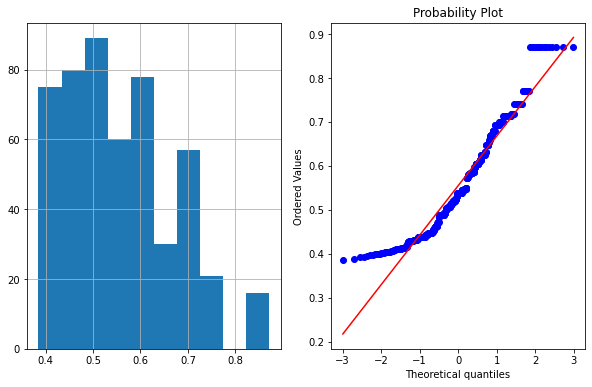

RM


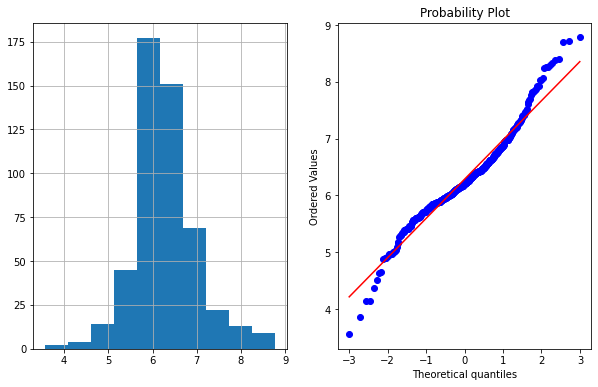

In [ ]:
for i in bos.columns:
    print(i)
    plot_data(bos,i)

In [ ]:
# Normalising the data
for col in bos.drop(columns = ['Target','CRIM','ZN','CHAS','AGE','RAD','PTRATIO','B']).columns:
    bos[col] = np.log1p(bos[col])

In [ ]:
for i in bos.drop(columns = ['Target','CRIM','ZN','CHAS','AGE','RAD','PTRATIO','B']).columns:
    print(i)
    plot_data(bos,i)

In [ ]:
def plotscatter(column):
    sns.scatterplot(x = bos[i], y = bos['Target'])
    plt.show()

In [ ]:
for i in bos.columns[:-1]:
    plotscatter(bos[i])

# Correlation check

In [ ]:
plt.figure(figsize = (20,8))
sns.heatmap(bos.corr(method = 'spearman'),annot =True)

In [ ]:
bos.columns

In [ ]:
#keeping the columns which has shown higher correlation with Target column
bos_df = bos[['INDUS','NOX','RM','AGE','PTRATIO','LSTAT','Target']]
bos_df

In [ ]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
### fit vs fit_transform
bos_scaled=scaler.fit_transform(bos_df.drop(columns = ['Target']))

In [ ]:
#variance InflationFactor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(bos_scaled,i) for i in range(bos_scaled.shape[1])]
vif['features'] = bos_df.drop(columns = ['Target']).columns
vif

### Fidings:
 -   There are lot of outliers(66,68) in CRIM and ZN columns
 -  There is no multicollinearity which is existing, there is some multicollinearity between NOX and DIS (negative .84) but right we can ignore we will check it later

# spliting the data

In [ ]:
bos_scaled= pd.DataFrame(bos_scaled, columns = bos_df.columns[:-1])

In [ ]:
x,y =bos_scaled, bos['Target']
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state =76)

# Linear Regression

In [ ]:
lr =LinearRegression()
lr.fit(X_train,y_train)

In [ ]:
lr.score(X_train,y_train)

In [ ]:
lr.score(X_test,y_test)

In [ ]:
y_pred_lr = lr.predict(X_test)
print("r2_score value for LinearRegression model is", r2_score(y_test,y_pred_lr))
r2_score(y_test,y_pred_lr)
print("rmse value for LinearRegression model is", np.sqrt(mean_squared_error(y_test,y_pred_lr)))

# Polynomial Regression

In [ ]:


for i in range(2,10):
    polyfeature = PolynomialFeatures(degree =i)
    x_poly_train = polyfeature.fit_transform(X_train)
    x_poly_test = polyfeature.fit_transform(X_test)
    plr = LinearRegression()
    plr.fit(x_poly_train, y_train)
    print("######################################################")
    print("######################################################")
    print("Degree: ", i)
    print("######################################################")
    
    y_train_pred = plr.predict(x_poly_train)
    print("r2_score for traindataset", r2_score(y_train, y_train_pred))
    y_test_pred = plr.predict(x_poly_test)
    print("r2_score for testdataset", r2_score(y_test, y_test_pred))
    print("RMSE train",np.sqrt(mean_squared_error(y_train,y_train_pred)) )
    print("RMSE test",np.sqrt(mean_squared_error(y_test, y_test_pred)))

In [ ]:
polyfeature = PolynomialFeatures(degree =2)
x_poly_train = polyfeature.fit_transform(X_train)
x_poly_test = polyfeature.fit_transform(X_test)
plr = LinearRegression()
plr.fit(x_poly_train, y_train)
print("######################################################")
print("######################################################")
print("Degree: ", 2)
print("######################################################")

y_train_pred = plr.predict(x_poly_train)
print("r2_score for traindataset", r2_score(y_train, y_train_pred))
y_test_pred = plr.predict(x_poly_test)
print("r2_score for testdataset", r2_score(y_test, y_test_pred))
print("RMSE train",np.sqrt(mean_squared_error(y_train,y_train_pred)) )
print("RMSE test",np.sqrt(mean_squared_error(y_test, y_test_pred)))

In [ ]:
def adjr2(x,y):
    r2=plr.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adj_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2
    

In [ ]:
adjr2(x_poly_train, y_train)

In [ ]:
adjr2(x_poly_test, y_test)

# LassoCv

In [ ]:
lassocv = LassoCV(cv = 35, max_iter=500, n_alphas = 150,normalize=True)
lassocv.fit(X_train,y_train)

In [ ]:
print(lassocv.score(X_train,y_train))
print(lassocv.score(X_test,y_test))
print(lassocv.alpha_)

In [ ]:
y_pred_lrcv = lassocv.predict(X_test)
print("r2_score value for LinearRegression model is", r2_score(y_test,y_pred_lr))
r2_score(y_test,y_pred_lr)
print("rmse value for LinearRegression model is", np.sqrt(mean_squared_error(y_test,y_pred_lrcv)))

# RidgeCv

In [ ]:
ridgecv = RidgeCV(cv = 35, alphas = np.random.uniform(0,10,50),normalize=True)
ridgecv.fit(X_train,y_train)

In [ ]:
print(ridgecv.score(X_train,y_train))
print(ridgecv.score(X_test,y_test))
print(ridgecv.alpha_)

In [ ]:
y_pred_rcv = ridgecv.predict(X_test)
print("r2_score value for LinearRegression model is", r2_score(y_test,y_pred_rcv))
r2_score(y_test,y_pred_lr)
print("rmse value for LinearRegression model is", np.sqrt(mean_squared_error(y_test,y_pred_rcv)))

# Selected Model
##### as we see Polynomialregression with degree 2 (or 3) performing well on train and testa nd producing low bias and variance in comparison to other models so we will take model ito consideration

In [ ]:
import pickle
pickle.dump(plr, open('boston.pickle', 'wb'))
pickle.dump(scaler, open('boston_scaler.pickle','wb'))

In [ ]:
bos_scaled.columns

In [ ]:
bos.describe()

In [ ]:
RIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's